# ANZ Data EDA

## Goals
- Check for any issue, error, outliers, etc.
- Anlayze the data and find attributes that correlate to the salary
- Create a model to predict the yearly salary

## Data
containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

In [99]:
# libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Read File

In [100]:
# Declare path & filename
dir = '../data'
file_name = 'ANZ synthesised transaction dataset.xlsx'
path = os.path.join(dir, file_name)

In [101]:
# read the file
df = pd.read_excel(path)

In [102]:
# check first 5 record
df.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Exploratory Data Analysis

In this part, we're going to find issues, insight, and pattern in the data. The EDA is done through Tableau, because no major issues in the data. Tableau is more interactive and learning about the data is easier done through Tableau. 

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [104]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [105]:
print(min(df.date))
print(max(df.date))

2018-08-01 00:00:00
2018-10-31 00:00:00


## Exploring Columns

These top and lowest transation of an account.

In [106]:
for col in df.columns:
    print(col)

status
card_present_flag
bpay_biller_code
account
currency
long_lat
txn_description
merchant_id
merchant_code
first_name
balance
date
gender
age
merchant_suburb
merchant_state
extraction
amount
transaction_id
country
customer_id
merchant_long_lat
movement


Checking out columns unique values, to find possible values to explore

In [107]:
cols = ['status', 'currency', 'txn_description', 'gender', 'extraction', 'country', 'movement']
for col in cols:
    print(col)
    print(df[col].unique())


status
['authorized' 'posted']
currency
['AUD']
txn_description
['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']
gender
['F' 'M']
extraction
['2018-08-01T01:01:15.000+0000' '2018-08-01T01:13:45.000+0000'
 '2018-08-01T01:26:15.000+0000' ... '2018-10-31T23:34:25.000+0000'
 '2018-10-31T23:47:05.000+0000' '2018-10-31T23:59:44.000+0000']
country
['Australia']
movement
['debit' 'credit']


In [108]:
# filtering out the PAY/SALARY that we wanted to predict
salary_df = df[df['txn_description'] == 'PAY/SALARY']
print(len(salary_df))

883


In [109]:
salary_df.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [110]:
corr = salary_df[['balance', 'age', 'amount']].corr()

<AxesSubplot:>

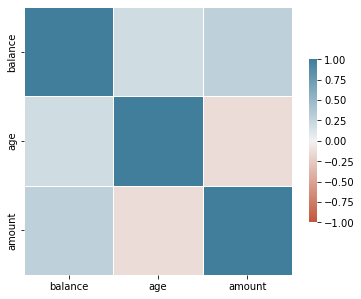

In [111]:
# finding correlation between the  attributes
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.7, cbar_kws={"shrink": .5})

In [112]:
# get unecesarry columns
important = []
for col in df.columns:
    unique_values =  salary_df[col].unique()
    # if the unique values more than 1, which mean not unqiue, add it to important list 
    if len(unique_values) >1:
        important.append(col)

In [113]:
salary_df.head(4)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit


In [114]:
# filtered out unimportant columns
filtered_salary_df = salary_df[important]

In [115]:
filtered_salary_df.head(5)

,account,long_lat,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id
50,ACC-588564840,151.27 -33.76,Isaiah,8342.11,2018-08-01,M,23,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821
61,ACC-1650504218,145.01 -37.93,Marissa,2040.58,2018-08-01,F,23,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281
64,ACC-3326339947,151.18 -33.80,Eric,3158.51,2018-08-01,M,22,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476
68,ACC-3541460373,145.00 -37.83,Jeffrey,2517.66,2018-08-01,M,24,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684
70,ACC-2776252858,144.95 -37.76,Kristin,2271.79,2018-08-01,F,43,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273


In [116]:
filtered_salary_df.sort_values(by='account').head(5)

,account,long_lat,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id
10816,ACC-1037050564,153.10 -27.66,Rhonda,5524.86,2018-10-22,F,40,2018-10-22T11:00:00.000+0000,892.09,05a4c832470f4a5aad166b965be8862c,CUS-1614226872
11749,ACC-1037050564,153.10 -27.66,Rhonda,6065.02,2018-10-29,F,40,2018-10-29T11:00:00.000+0000,892.09,e7e999056a1f4afdac171426e96c58ee,CUS-1614226872
8937,ACC-1037050564,153.10 -27.66,Rhonda,4545.77,2018-10-08,F,40,2018-10-08T11:00:00.000+0000,892.09,cbd08944c11c413ea210dcca994274e9,CUS-1614226872
5185,ACC-1037050564,153.10 -27.66,Rhonda,3724.18,2018-09-10,F,40,2018-09-10T11:00:00.000+0000,892.09,1cbbcb140c64400fb52801626b1631f4,CUS-1614226872
7056,ACC-1037050564,153.10 -27.66,Rhonda,4465.56,2018-09-24,F,40,2018-09-24T11:00:00.000+0000,892.09,73e282fb810d4273b5482aa4c3cc601a,CUS-1614226872


In [117]:
# removed unecessary collumns
filtered_salary_df = filtered_salary_df.drop(columns=['transaction_id', 'customer_id', 'long_lat', 'first_name', 'extraction'])

In [118]:
filtered_salary_df.head(5)

,account,balance,date,gender,age,amount
50,ACC-588564840,8342.11,2018-08-01,M,23,3903.95
61,ACC-1650504218,2040.58,2018-08-01,F,23,1626.48
64,ACC-3326339947,3158.51,2018-08-01,M,22,983.36
68,ACC-3541460373,2517.66,2018-08-01,M,24,1408.08
70,ACC-2776252858,2271.79,2018-08-01,F,43,1068.04


### Exploring Correlation or Pattern of customer to the Salary

Using visualization to figure out if salary is affected by gender, age, etc.

<AxesSubplot:xlabel='amount', ylabel='gender'>

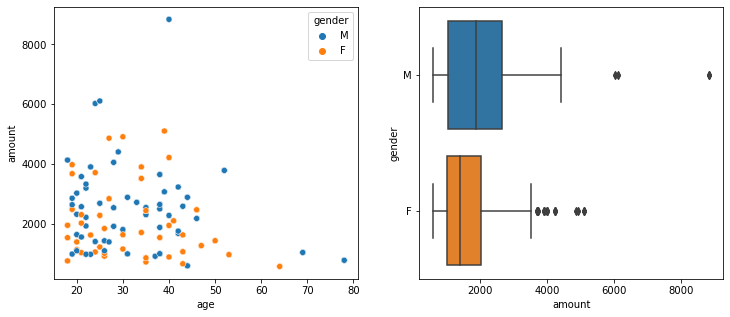

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(data=filtered_salary_df, x="age", y="amount", hue="gender", ax=axes[0])
sns.boxplot(data=filtered_salary_df, x="amount", y="gender", ax=axes[1])

Fromt the visualization above, we could see that there are no strong correlation between age and ammount. On the other hand, age give us a 

In [120]:
df[df['account'] == 'ACC-1037050564'].head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
30,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,POS,02d45834-6f65-4f52-9a33-0b242dd7a078,NaN,Rhonda,...,40,North Lakes,QLD,2018-08-01T09:15:03.000+0000,45.12,ad101b96b9d44b968b2519e2bb26a649,Australia,CUS-1614226872,152.99 -27.21,debit
40,posted,NaN,NaN,ACC-1037050564,AUD,153.10 -27.66,PAYMENT,NaN,NaN,Rhonda,...,40,NaN,NaN,2018-08-01T10:00:00.000+0000,32.00,94622881419c44e1b799a52d82572207,Australia,CUS-1614226872,NaN,debit
76,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,1ab3e343-3775-4d54-9dac-2b0834500025,NaN,Rhonda,...,40,Port Macquarie,NSW,2018-08-01T14:28:14.000+0000,11.05,353c30ef66e345059a22305b36f138a2,Australia,CUS-1614226872,152.92 -31.43,debit
124,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,3de54244-f7ba-46c9-aa99-01bd54625d25,NaN,Rhonda,...,40,Brisbane Airport,QLD,2018-08-01T20:09:28.000+0000,65.11,fe3610e9d3ab418bba2ae7a62c56bc97,Australia,CUS-1614226872,153.12 -27.39,debit


In [121]:
spending = df[df['txn_description'] != 'PAY/SALARY']

In [122]:
spending['month'] = spending['date'].apply(lambda date: 
    date.month
)

/tmp/ipykernel_74455/4157500905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending['month'] = spending['date'].apply(lambda date:


In [123]:
spending['week'] = spending['date'].apply(lambda date: 
    date.week
)

/tmp/ipykernel_74455/3916652578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending['week'] = spending['date'].apply(lambda date:


In [124]:
spending = spending[['account','month', 'amount']]
result  = spending.groupby(by=['account', 'month']).agg('sum')
result

amount
account        month         
ACC-1037050564 8      2804.61
               9      2835.75
               10     2048.91
ACC-1056639002 8      1392.56
               9      1560.84
...                       ...
ACC-964839203  9      3272.72
               10     1319.69
ACC-966140392  8      2438.95
               9      1403.66
               10     1663.22

[299 rows x 1 columns]

In [125]:
result = result.reset_index()

In [126]:
result.head(10)

,account,month,amount
0,ACC-1037050564,8,2804.61
1,ACC-1037050564,9,2835.75
2,ACC-1037050564,10,2048.91
3,ACC-1056639002,8,1392.56
4,ACC-1056639002,9,1560.84
5,ACC-1056639002,10,678.13
6,ACC-1199531521,8,1196.57
7,ACC-1199531521,9,3391.02
8,ACC-1199531521,10,1155.12
9,ACC-1217063613,8,42.02


In [127]:
salary = df[df['txn_description'] == 'PAY/SALARY']
salary.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [128]:
salary['month'] = salary['date'].apply(lambda date: 
    date.month
)

/tmp/ipykernel_74455/1676202727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary['month'] = salary['date'].apply(lambda date:


In [129]:
salary.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'month'],
      dtype='object')

In [130]:
salary = salary[['account','month','gender','amount']]

In [131]:
salary = salary.groupby(by=['account','month','gender']).agg('sum')
salary = salary.reset_index()

In [132]:
salary

,account,month,gender,amount
0,ACC-1037050564,8,F,3568.36
1,ACC-1037050564,9,F,3568.36
2,ACC-1037050564,10,F,4460.45
3,ACC-1056639002,8,M,6390.02
4,ACC-1056639002,9,M,6390.02
...,...,...,...,...
291,ACC-964839203,9,M,6240.80
292,ACC-964839203,10,M,6240.80
293,ACC-966140392,8,M,7718.73
294,ACC-966140392,9,M,5145.82


In [133]:
result

,account,month,amount
0,ACC-1037050564,8,2804.61
1,ACC-1037050564,9,2835.75
2,ACC-1037050564,10,2048.91
3,ACC-1056639002,8,1392.56
4,ACC-1056639002,9,1560.84
...,...,...,...
294,ACC-964839203,9,3272.72
295,ACC-964839203,10,1319.69
296,ACC-966140392,8,2438.95
297,ACC-966140392,9,1403.66


In [134]:
salary = salary.rename(columns={"amount": "monthly_salary"})
result = result.rename(columns={"amount": "monthly_expenses"})

In [135]:
final_df = salary.merge(result, on=['account','month'], how="left")

In [136]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 295
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           296 non-null    object 
 1   month             296 non-null    int64  
 2   gender            296 non-null    object 
 3   monthly_salary    296 non-null    float64
 4   monthly_expenses  295 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 13.9+ KB


In [137]:
final_df

,account,month,gender,monthly_salary,monthly_expenses
0,ACC-1037050564,8,F,3568.36,2804.61
1,ACC-1037050564,9,F,3568.36,2835.75
2,ACC-1037050564,10,F,4460.45,2048.91
3,ACC-1056639002,8,M,6390.02,1392.56
4,ACC-1056639002,9,M,6390.02,1560.84
...,...,...,...,...,...
291,ACC-964839203,9,M,6240.80,3272.72
292,ACC-964839203,10,M,6240.80,1319.69
293,ACC-966140392,8,M,7718.73,2438.95
294,ACC-966140392,9,M,5145.82,1403.66


<AxesSubplot:xlabel='monthly_salary', ylabel='monthly_expenses'>

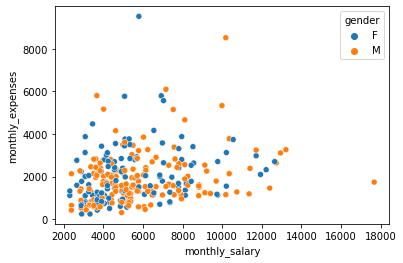

In [138]:
sns.scatterplot(data=final_df, x='monthly_salary', y='monthly_expenses', hue="gender")

In [139]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [155]:
df[df['txn_description'] == 'POS'][['date','amount', 'txn_description']].head(10)

,date,amount,txn_description
0,2018-08-01,16.25,POS
2,2018-08-01,6.42,POS
7,2018-08-01,15.61,POS
8,2018-08-01,19.25,POS
15,2018-08-01,10.79,POS
19,2018-08-01,7.37,POS
20,2018-08-01,14.10,POS
21,2018-08-01,24.77,POS
23,2018-08-01,12.08,POS
24,2018-08-01,72.12,POS


In [156]:
df[df['txn_description'] == 'SALES-POS'][['date','amount', 'txn_description']].head(10)

,date,amount,txn_description
1,2018-08-01,14.19,SALES-POS
3,2018-08-01,40.90,SALES-POS
4,2018-08-01,3.25,SALES-POS
6,2018-08-01,61.06,SALES-POS
12,2018-08-01,6.08,SALES-POS
22,2018-08-01,13.67,SALES-POS
27,2018-08-01,17.96,SALES-POS
28,2018-08-01,14.49,SALES-POS
29,2018-08-01,11.57,SALES-POS
32,2018-08-01,9.67,SALES-POS


In [154]:
df[df['txn_description'] == 'PAYMENT'][['date','amount', 'txn_description']].head(10)

,date,amount,txn_description
5,2018-08-01,163.0,PAYMENT
10,2018-08-01,27.0,PAYMENT
11,2018-08-01,29.0,PAYMENT
17,2018-08-01,55.0,PAYMENT
18,2018-08-01,58.0,PAYMENT
26,2018-08-01,36.0,PAYMENT
40,2018-08-01,32.0,PAYMENT
42,2018-08-01,34.0,PAYMENT
43,2018-08-01,29.0,PAYMENT
44,2018-08-01,150.0,PAYMENT


In [153]:
df[df['txn_description'] == 'INTER BANK'][['date','amount', 'txn_description']].head(10)

,date,amount,txn_description
9,2018-08-01,21.0,INTER BANK
13,2018-08-01,25.0,INTER BANK
14,2018-08-01,39.0,INTER BANK
16,2018-08-01,22.0,INTER BANK
25,2018-08-01,25.0,INTER BANK
41,2018-08-01,39.0,INTER BANK
63,2018-08-01,57.0,INTER BANK
69,2018-08-01,26.0,INTER BANK
122,2018-08-01,33.0,INTER BANK
126,2018-08-01,43.0,INTER BANK


In [159]:
df_temp = df
df_temp['month'] = df_temp['date'].apply(lambda date: 
    date.month
)

In [160]:
df_temp = df_temp[['account','month','txn_description','amount','gender','age']]

In [161]:
df_temp.head(10)

,account,month,txn_description,amount,gender,age
0,ACC-1598451071,8,POS,16.25,F,26
1,ACC-1598451071,8,SALES-POS,14.19,F,26
2,ACC-1222300524,8,POS,6.42,M,38
3,ACC-1037050564,8,SALES-POS,40.90,F,40
4,ACC-1598451071,8,SALES-POS,3.25,F,26
5,ACC-1608363396,8,PAYMENT,163.00,M,20
6,ACC-2776252858,8,SALES-POS,61.06,F,43
7,ACC-2776252858,8,POS,15.61,F,43
8,ACC-182446574,8,POS,19.25,F,27
9,ACC-602667573,8,INTER BANK,21.00,M,40


In [169]:
grouped = df_temp.groupby(['account','month','age','gender', 'txn_description']).sum()
grouped

amount
account        month age gender txn_description         
ACC-1037050564 8     40  F      PAY/SALARY       3568.36
                                PAYMENT           292.00
                                POS              1551.59
                                SALES-POS         961.02
               9     40  F      PAY/SALARY       3568.36
...                                                  ...
ACC-966140392  10    21  M      PAY/SALARY       5145.82
                                PAYMENT           554.00
                                PHONE BANK        355.00
                                POS               289.65
                                SALES-POS         464.57

[1378 rows x 1 columns]

In [170]:
gr_ri = grouped.reset_index()

In [171]:
gr_ri.head(10)

,account,month,age,gender,txn_description,amount
0,ACC-1037050564,8,40,F,PAY/SALARY,3568.36
1,ACC-1037050564,8,40,F,PAYMENT,292.00
2,ACC-1037050564,8,40,F,POS,1551.59
3,ACC-1037050564,8,40,F,SALES-POS,961.02
4,ACC-1037050564,9,40,F,PAY/SALARY,3568.36
5,ACC-1037050564,9,40,F,PAYMENT,260.00
6,ACC-1037050564,9,40,F,POS,910.49
7,ACC-1037050564,9,40,F,SALES-POS,1665.26
8,ACC-1037050564,10,40,F,PAY/SALARY,4460.45
9,ACC-1037050564,10,40,F,PAYMENT,292.00


In [167]:
sal =  gr_ri[gr_ri['txn_description'] == 'PAY/SALARY']['amount']
pay =  gr_ri[gr_ri['txn_description'] == 'PAYMENT']['amount']
pos =  gr_ri[gr_ri['txn_description'] == 'POS']['amount']
spos =  gr_ri[gr_ri['txn_description'] == 'SALES-POS']['amount']

In [172]:
spos

3        961.02
7       1665.26
11       819.58
16       424.49
21       805.69
         ...   
1360     311.27
1364     284.79
1368     603.59
1372     671.78
1377     464.57
Name: amount, Length: 277, dtype: float64

In [180]:
final_df = gr_ri.pivot_table(index=['account','month','age','gender'],columns=['txn_description'], values=['amount'], aggfunc='first')

In [186]:
test = final_df.reset_index()

In [195]:
final_df.head(2)

amount                                \
txn_description                 INTER BANK PAY/SALARY PAYMENT PHONE BANK   
account        month age gender                                            
ACC-1037050564 8     40  F             NaN    3568.36   292.0        NaN   
               9     40  F             NaN    3568.36   260.0        NaN   

                                                    
txn_description                      POS SALES-POS  
account        month age gender                     
ACC-1037050564 8     40  F       1551.59    961.02  
               9     40  F        910.49   1665.26

In [196]:
final_df.columns

MultiIndex([('amount', 'INTER BANK'),
            ('amount', 'PAY/SALARY'),
            ('amount',    'PAYMENT'),
            ('amount', 'PHONE BANK'),
            ('amount',        'POS'),
            ('amount',  'SALES-POS')],
           names=[None, 'txn_description'])

In [198]:
final_df.index

MultiIndex([('ACC-1037050564',  8, 40, 'F'),
            ('ACC-1037050564',  9, 40, 'F'),
            ('ACC-1037050564', 10, 40, 'F'),
            ('ACC-1056639002',  8, 22, 'M'),
            ('ACC-1056639002',  9, 22, 'M'),
            ('ACC-1056639002', 10, 22, 'M'),
            ('ACC-1199531521',  8, 52, 'M'),
            ('ACC-1199531521',  9, 52, 'M'),
            ('ACC-1199531521', 10, 52, 'M'),
            ('ACC-1217063613',  8, 27, 'F'),
            ...
            (  'ACC-90814749', 10, 35, 'M'),
            ( 'ACC-958000567',  8, 34, 'F'),
            ( 'ACC-958000567',  9, 34, 'F'),
            ( 'ACC-958000567', 10, 34, 'F'),
            ( 'ACC-964839203',  8, 21, 'M'),
            ( 'ACC-964839203',  9, 21, 'M'),
            ( 'ACC-964839203', 10, 21, 'M'),
            ( 'ACC-966140392',  8, 21, 'M'),
            ( 'ACC-966140392',  9, 21, 'M'),
            ( 'ACC-966140392', 10, 21, 'M')],
           names=['account', 'month', 'age', 'gender'], length=300)

In [194]:
test.head(2)

account month age gender     amount             \
txn_description                                  INTER BANK PAY/SALARY   
0                ACC-1037050564     8  40      F        NaN    3568.36   
1                ACC-1037050564     9  40      F        NaN    3568.36   

                                                       
txn_description PAYMENT PHONE BANK      POS SALES-POS  
0                 292.0        NaN  1551.59    961.02  
1                 260.0        NaN   910.49   1665.26

In [197]:
test.columns

MultiIndex([('account',           ''),
            (  'month',           ''),
            (    'age',           ''),
            ( 'gender',           ''),
            ( 'amount', 'INTER BANK'),
            ( 'amount', 'PAY/SALARY'),
            ( 'amount',    'PAYMENT'),
            ( 'amount', 'PHONE BANK'),
            ( 'amount',        'POS'),
            ( 'amount',  'SALES-POS')],
           names=[None, 'txn_description'])

In [205]:
test.columns = ['account', 'month', 'age', 'gender', 'inter-bank', 'salary', 'payment', 'phone-bank', 'pos', 'sales-pos']

In [211]:
test.head(5)

,account,month,age,gender,inter-bank,salary,payment,phone-bank,pos,sales-pos
0,ACC-1037050564,8,40,F,NaN,3568.36,292.0,NaN,1551.59,961.02
1,ACC-1037050564,9,40,F,NaN,3568.36,260.0,NaN,910.49,1665.26
2,ACC-1037050564,10,40,F,NaN,4460.45,292.0,NaN,937.33,819.58
3,ACC-1056639002,8,22,M,291.0,6390.02,249.0,NaN,428.07,424.49
4,ACC-1056639002,9,22,M,327.0,6390.02,249.0,NaN,179.15,805.69


Text(0.5, 1.0, 'Phone Banking - Salary')

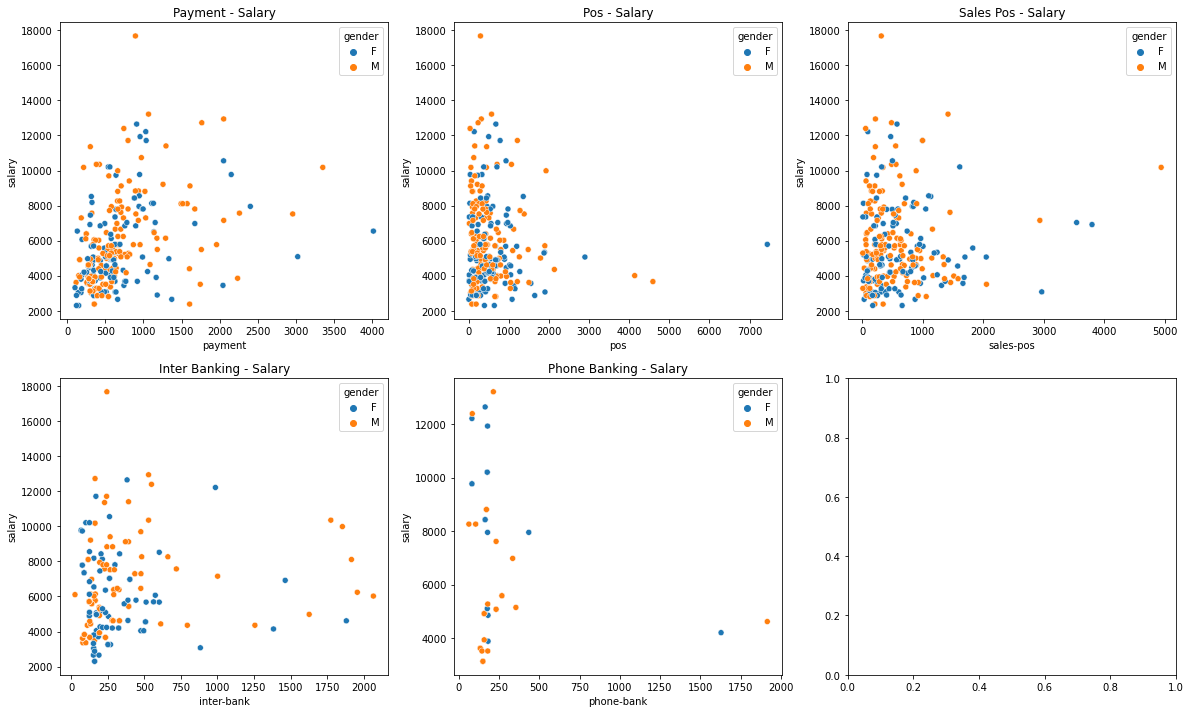

In [218]:
fig, axs = plt.subplots(2,3, figsize=(20,12))
sns.scatterplot(data=test, x='payment', y='salary', hue="gender", ax=axs[0,0])
sns.scatterplot(data=test, x='pos', y='salary', hue="gender", ax=axs[0,1])
sns.scatterplot(data=test, x='sales-pos', y='salary', hue="gender", ax=axs[0,2])
sns.scatterplot(data=test, x='inter-bank', y='salary', hue="gender", ax=axs[1,0])
sns.scatterplot(data=test, x='phone-bank', y='salary', hue="gender", ax=axs[1,1])
axs[0,0].set_title('Payment - Salary')
axs[0,1].set_title('Pos - Salary')
axs[0,2].set_title('Sales Pos - Salary')
axs[1,0].set_title('Inter Banking - Salary')
axs[1,1].set_title('Phone Banking - Salary')
